In [36]:
%matplotlib inline

In [12]:
theano.config.floatX = 'float32'

In [4]:
import theano
from theano import tensor as T
#初期化: scalarメソッドではスカラー(単純な配列)を生成
x1 = T.scalar()
w1 = T.scalar()
w0 = T.scalar()
z1 = w1 * x1 * w0

In [6]:
#コンパイル
net_input = theano.function(inputs=[w1, x1, w0], outputs=z1)

In [7]:
#実行
print('Net input: %.2f' % net_input(2.0, 1.0, 0.5))

Net input: 1.00


In [8]:
net_input(2.0, 1.0, 0.5)

array(1.0)

In [15]:
print(theano.config.floatX)

float32


In [10]:
theano.config.floatX = 'float32'

In [13]:
print(theano.config.device)

cpu


In [17]:
import numpy as np
#初期化
x = T.fmatrix(name='x')
x_sum = T.sum(x, axis=0)

#コンパイル
calc_sum = theano.function(inputs=[x], outputs=x_sum)

#実行(Pythonリスト)
ary = [[1,2,3], [1,2,3]]
print('Column sum:', calc_sum(ary))

#実行(Numpy配列)
ary = np.array([[1,2,3], [1,2,3]], dtype=theano.config.floatX)
print('Column sum:', calc_sum(ary))

Column sum: [ 2.  4.  6.]
Column sum: [ 2.  4.  6.]


In [19]:
print(x)
print(x.type())

x
<TensorType(float32, matrix)>


In [22]:
#初期化
x = T.fmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w, w + 1.0]]

#コンパイル
net_input = theano.function(inputs=[x], updates=update, outputs=z)

#実行
#️for文を繰り返すたびにupdate式でupdate
data = np.array([[1,2,3]], dtype=theano.config.floatX)
for i in range(5):
    print('z%d:' % i, net_input(data))

z0: [[ 0.]]
z1: [[ 6.]]
z2: [[ 12.]]
z3: [[ 18.]]
z4: [[ 24.]]


In [20]:
np.asarray([[0.0, 0.0, 0.0]])

array([[ 0.,  0.,  0.]])

In [23]:
#初期化
data = np.array([[1,2,3]], dtype=theano.config.floatX)
x = T.fmatrix('x')
w = theano.shared(np.asarray([[0.0,0.0,0.0]], dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w, w+1.0]]
#コンパイル
net_input = theano.function(inputs=[], updates=update, givens={x:data}, outputs=z)
#実行
for i in range(5):
    print('z%d' % i , net_input())

z0 [[ 0.]]
z1 [[ 6.]]
z2 [[ 12.]]
z3 [[ 18.]]
z4 [[ 24.]]


線形回帰

In [28]:
data.shape

(1, 3)

In [24]:
X_train = np.asarray([[0.0], [1.0],
                                      [2.0], [3.0],
                                      [4.0],[5.0],
                                      [6.0], [7.0],
                                      [8.0], [9.0]], dtype=theano.config.floatX)
y_train = np.asarray([1.0, 1.3,
                                      3.1,2.0,
                                      5.0, 6.3,
                                      6.6, 7.4,
                                      8.0, 9.0], dtype=theano.config.floatX)

In [26]:
X_train.shape

(10, 1)

In [33]:
w = np.zeros(shape=(X_train.shape[1] ))

In [34]:
X_train.dot(w)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [29]:
y_train.shape

(10,)

In [38]:
import theano
from theano import tensor as T
import numpy as np

def train_linreg(X_train, y_train, eta, epochs):
    costs = []
    #配列の初期化
    eta0 = T.fscalar('eta0') # float32型のスカラーのインスタンス
    y = T.fvector(name='y') # float32型のベクトルのインスタンス
    X = T.fmatrix(name='x') # float32型の行列のインスタンス
    #重みwを関数内で参照可能な共有関数として作成
    w = theano.shared(np.zeros(shape=(X_train.shape[1] +1),
                                      dtype=theano.config.floatX),
                                      name='w')
    
    #コストの計算
    net_input = T.dot(X, w[1:]) + w[0]#重みを用いて総入力を計算
    errors = y - net_input                       #yと総入力の誤差
    cost = T.sum(T.pow(errors, 2))      #誤差の平方和
    
    #重みの更新
    gradient = T.grad(cost, wrt=w)#コストの勾配(自動微分)
    update = [(w, w - eta0 * gradient)] #コストの勾配に学習率をかけて重みwを更新
    
    
    #モデルのコンパイル
    train = theano.function(inputs=[eta0], outputs=cost, updates=update, givens={X: X_train, y: y_train})
    
    #実行
    for _ in range(epochs):
        costs.append(train(eta))
    
    return costs, w
    

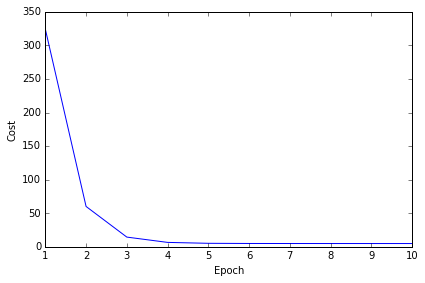

In [40]:
import matplotlib.pyplot as plt
costs, w = train_linreg(X_train, y_train, eta=0.001, epochs=10)
plt.plot(range(1, len(costs)+1), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()

In [41]:
def predict_linreg(X, w):
    Xt = T.matrix(name='X')
    net_input = T.dot(Xt, w[1:]) + w[0]
    predict = theano.function(inputs=[Xt], givens={w:w}, outputs=net_input)
    
    return predict(X)

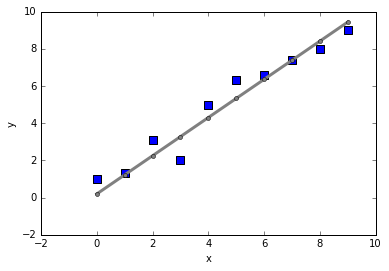

In [44]:
plt.scatter(X_train, y_train, marker='s', s=50)
plt.plot(range(X_train.shape[0]), predict_linreg(X_train, w),
        color='gray', marker='o', markersize=4, lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [43]:
range(X_train.shape[0])

range(0, 10)

In [46]:
X  = np.array([[1, 1.4, 1.5]])
w = np.array([0.0, 0.2, 0.4])

def net_input(X, w):
    z = X.dot(w)
    return z

def logistic(z):
    return 1.0/(1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w)[0])

P(y=1|x) = 0.707


In [47]:
#W: array, shape= [n_output_units, n_hidden_units+1]
#隠れ層 -> 出力層の重み行列
#最初の列はバイアスユニット
W = np.array([[1.1, 1.2, 1.3, 0.5],
             [0.1, 0.2, 0.4, 0.1],
             [0.2, 0.5, 2.1, 1.9]])

#A: array, shape=[n_hidden+1, n_samples]
#隠れ層の活性化
#最初の要素はバイアスユニット
A = np.array([[1.0],
             [0.1],
             [0.3],
             [0.7]])

#Z: array, shape=[n_output_units, n_samples]
#出力層の総入力
Z = W.dot(A)
y_probas = logistic(Z)
print('Probabilities:\n', y_probas)

Probabilities:
 [[ 0.87653295]
 [ 0.57688526]
 [ 0.90114393]]


In [48]:
y_class = np.argmax(Z, axis=0)
print('predicted class label: %d' % y_class[0])

predicted class label: 2


In [52]:
y_class

array([2])

In [54]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

def softmax_activation(X, w):
    z = net_input(X, w)
    return softmax(z)

y_probs = softmax(Z)
print('Probabilities: \n' , y_probs)

Probabilities: 
 [[ 0.40386493]
 [ 0.07756222]
 [ 0.51857284]]


In [55]:
y_probs.sum()

1.0

In [56]:
np.exp(Z)

array([[ 7.09932707],
       [ 1.36342511],
       [ 9.11571639]])

In [57]:
Z

array([[ 1.96],
       [ 0.31],
       [ 2.21]])

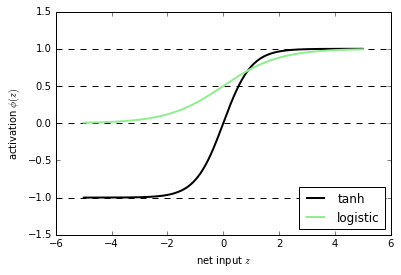

In [58]:
import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0.5, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(-1, color='black', linestyle='--')
plt.plot(z, tanh_act, lw=2, color='black', label='tanh')
plt.plot(z, log_act, lw=2, color='lightgreen', label='logistic')
plt.legend(loc='lower right')
plt.show()

In [66]:
import keras

Using TensorFlow backend.


In [69]:
import os
import struct
import numpy as np
def load_mnist(path, kind='train'):
    """MNISTデータをpathからロード"""
    #引数を指定したパスを結合(ラベルや画像のパスを作成)
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' %kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' %kind)
    
    #ファイルを読み込む:
    #引数にファイル、モードを指定
    with open(labels_path, 'rb') as lbpath:
        #バイナリーを文字列に変換: unpack関数の引数にフォーマット(>はビッグエンディアン、Iは符号なし整数)、
        #８バイト分のバイナリーデータを指定してマジックナンバー、アイテムの個数を読み込む
        #ヘッダ領域が 8 バイト
        magic, n = struct.unpack('>II', lbpath.read(8))
        #ファイルからラベルを読み込み、配列を構築: fromfile関数の引数にファイル、配列のデータ形式を指定
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        #ヘッダ領域が 16 バイト
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        #画像ピクセル情報の配列のサイズを変更
        # (行数:ラベルのサイズ, 列数:特徴量の個数)
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels

In [70]:
X_train, y_train = load_mnist('/Users/keeeeei/Desktop/データ分析/Python機械学習プログラミング/mnist', kind='train')
print('Rows: %d, columns: %d' %(X_train.shape[0], X_train.shape[1]))
X_test, y_test = load_mnist('/Users/keeeeei/Desktop/データ分析/Python機械学習プログラミング/mnist', kind='t10k')
print('Rows: %d, columns: %d' %(X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


In [71]:
import theano
theano.config.floatX = 'float32'
X_train = X_train.astype(theano.config.floatX)
X_test = X_test.astype(theano.config.floatX)

In [73]:
from keras.utils import np_utils
print('First 3 labels: ', y_train[:3])
y_train_ohe = np_utils.to_categorical(y_train)
print('\nFirst 3 labels (one-hot): \n' , y_train_ohe[:3])

First 3 labels:  [5 0 4]

First 3 labels (one-hot): 
 [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [74]:
y_train_ohe.shape

(60000, 10)

In [75]:
theano.config.device

'cpu'

In [86]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD #確率的勾配降下法

np.random.seed(1)

model = Sequential() #モデルを初期化
#１つ目の隠れ層を追加
model.add(Dense(input_dim=X_train.shape[1], #入力ユニット数
               output_dim=50, #出力ユニット数
               init='uniform', #重みを一様乱数で初期化
               activation='tanh')) #活性化関数(双曲線正接関数)

#2つ目の隠れ層を追加
model.add(Dense(input_dim=50, #入力ユニット数
               output_dim=50, #出力ユニット数
               init='uniform', #重みを一様乱数で初期化
               activation='tanh')) #活性化関数(双曲線正接関数)

#出力層を追加
model.add(Dense(input_dim=50, #入力ユニット数
               output_dim=y_train_ohe.shape[1], #出力ユニット数
               init='uniform', #重みを一様乱数で初期化
               activation='softmax')) 

#モデルコンパイル時のオプティマイザを設定
#引数に学習率、荷重減衰定数、モーメンタム学習を設定
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
#モデルをコンパイル
model.compile(loss='categorical_crossentropy', #catagorical_crossentropyはロジスティック関数のコスト関数を表す
             optimizer='sgd', #オプティマイザ
             metrics=['accuracy']) #モデルの評価指標


model.fit(X_train,
         y_train_ohe,
         nb_epoch=50,#エポック数
         batch_size=300,
         verbose=1,#実行時にメッセージを出力
         validation_split=0.1) #検証用データの割合

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s - loss: 2.2404 - acc: 0.3573 - val_loss: 2.1345 - val_acc: 0.5267
Epoch 2/50
54000/54000 [==============================] - 2s - loss: 1.9136 - acc: 0.5499 - val_loss: 1.6131 - val_acc: 0.6095
Epoch 3/50
54000/54000 [==============================] - 2s - loss: 1.3848 - acc: 0.6261 - val_loss: 1.1436 - val_acc: 0.7003
Epoch 4/50
54000/54000 [==============================] - 2s - loss: 1.0399 - acc: 0.7229 - val_loss: 0.8753 - val_acc: 0.7830
Epoch 5/50
54000/54000 [==============================] - 2s - loss: 0.8278 - acc: 0.7971 - val_loss: 0.7049 - val_acc: 0.8573
Epoch 6/50
54000/54000 [==============================] - 2s - loss: 0.6836 - acc: 0.8411 - val_loss: 0.5733 - val_acc: 0.8808
Epoch 7/50
54000/54000 [==============================] - 2s - loss: 0.5843 - acc: 0.8607 - val_loss: 0.4911 - val_acc: 0.8920
Epoch 8/50
54000/54000 [==============================] - 3s -

In [87]:
y_train_pred = model.predict_classes(X_train,verbose=1)
print('First 3 prediction: ', y_train_pred[:3])

59936/60000 [============================>.] - ETA: 0sFirst 3 prediction:  [5 0 4]


In [88]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print('Training accuracy: %.2f%%' % (acc*100))

Training accuracy: 93.79%


In [90]:
y_test_pred = model.predict_classes(X_test,verbose=1)
test_acc = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('\nTraining accuracy: %.2f%%' % (test_acc*100))

 9920/10000 [============================>.] - ETA: 0s
Training accuracy: 93.20%
